# Google Business Store Dataset


Author: Natalia Mesquita
    
Status: Done
    
Goal: Explore Google Business dataset adding some first stats. 

In [3]:
from util import agg_jsonls  # helper function
from pprint import pprint
import numpy as np
import pandas as pd

In [4]:
#Print first review
reviewsGB = agg_jsonls("gbusiness")
print(f"We have a total of {len(reviewsGB)} reviews!")
pprint(reviewsGB[0])

We have a total of 142099 reviews!
{'caption': 'Muito boa!  O Cleversom nos atendeu com muita empatia e atenção!',
 'geo_location': {'lat': '-23.5448085', 'long': '-46.5175485'},
 'id_review': 'ChdDSUhNMG9nS0VJQ0FnSUNjdGN1SHJnRRABGhY3RXo1WS1Td0tMN3Fmdzh4UmQ1QjR3',
 'n_photo_user': 0,
 'n_review_user': 0,
 'rating': 4.0,
 'relative_date': '3 semanas atrás',
 'retrieval_date': '2020-04-13T17:25:36Z',
 'store': 'casas-bahia',
 'url_user': 'https://www.google.com/maps/contrib/109717936372979710465?hl=pt-BR',
 'username': 'Veranilce Carelli'}


In [5]:
#Percentage of reviews with comments
caption_reviews = [i for i in reviewsGB if len(i["caption"]) > 0]

print(f"Reviews with caption: {round((len(caption_reviews) / len(reviewsGB))*100,2)}%")

Reviews with caption: 40.12%


In [4]:
pprint(caption_reviews[0:3])

[{'caption': 'Muito boa!  O Cleversom nos atendeu com muita empatia e atenção!',
  'geo_location': {'lat': '-23.5448085', 'long': '-46.5175485'},
  'id_review': 'ChdDSUhNMG9nS0VJQ0FnSUNjdGN1SHJnRRABGhY3RXo1WS1Td0tMN3Fmdzh4UmQ1QjR3',
  'n_photo_user': 0,
  'n_review_user': 0,
  'rating': 4.0,
  'relative_date': '3 semanas atrás',
  'retrieval_date': '2020-04-13T17:25:36Z',
  'store': 'casas-bahia',
  'url_user': 'https://www.google.com/maps/contrib/109717936372979710465?hl=pt-BR',
  'username': 'Veranilce Carelli'},
 {'caption': 'Atendimento muito bom.!',
  'geo_location': {'lat': '-23.5448085', 'long': '-46.5175485'},
  'id_review': 'ChdDSUhNMG9nS0VJQ0FnSUNjNWNHYXRBRRABGhZ2Z1lLMjI5TjdNM2ZNb3FMNTQwZ2VB',
  'n_photo_user': 0,
  'n_review_user': 0,
  'rating': 5.0,
  'relative_date': '3 semanas atrás',
  'retrieval_date': '2020-04-13T17:25:36Z',
  'store': 'casas-bahia',
  'url_user': 'https://www.google.com/maps/contrib/115563939635497280539?hl=pt-BR',
  'username': 'Mathias Villan'},
 {

In [5]:
# Average rates
print(f"Average grade {np.average([i['rating'] for i in reviewsGB])}")

Average grade 3.9199853623178207


In [6]:
type(reviewsGB)

list

In [8]:
#Function to transform to dataframe format
def format_GB_to_df(review):
    cols_for_df = [  
  'caption',  
  'geo_location',  
  'id_review' ,
  'n_photo_user', 
  'n_review_user', 
  'rating' ,
  'relative_date', 
  'retrieval_date', 
  'store',
  'url_user', 
  'username'  ]
    r_cp = {col: review[col] for col in cols_for_df if col in review}
    return r_cp
    



In [9]:
dff = pd.DataFrame([format_GB_to_df(row) for row in reviewsGB])
dff.head()

,caption,geo_location,id_review,n_photo_user,n_review_user,rating,relative_date,retrieval_date,store,url_user,username
0,Muito boa! O Cleversom nos atendeu com muita ...,"{'lat': '-23.5448085', 'long': '-46.5175485'}",ChdDSUhNMG9nS0VJQ0FnSUNjdGN1SHJnRRABGhY3RXo1WS...,0,0,4.0,3 semanas atrás,2020-04-13T17:25:36Z,casas-bahia,https://www.google.com/maps/contrib/1097179363...,Veranilce Carelli
1,Atendimento muito bom.!,"{'lat': '-23.5448085', 'long': '-46.5175485'}",ChdDSUhNMG9nS0VJQ0FnSUNjNWNHYXRBRRABGhZ2Z1lLMj...,0,0,5.0,3 semanas atrás,2020-04-13T17:25:36Z,casas-bahia,https://www.google.com/maps/contrib/1155639396...,Mathias Villan
2,,"{'lat': '-23.5448085', 'long': '-46.5175485'}",ChZDSUhNMG9nS0VJQ0FnSUNjaFphblhBEAEaFmM0cTBhaV...,0,6,5.0,3 semanas atrás,2020-04-13T17:25:36Z,casas-bahia,https://www.google.com/maps/contrib/1147321611...,Maristela Boguta
3,,"{'lat': '-23.5448085', 'long': '-46.5175485'}",ChdDSUhNMG9nS0VJQ0FnSUNjaGNidzNBRRABGhZ4Z3Z6bG...,0,5,5.0,3 semanas atrás,2020-04-13T17:25:36Z,casas-bahia,https://www.google.com/maps/contrib/1067857579...,Daniele Andrade
4,👍🏼,"{'lat': '-23.5448085', 'long': '-46.5175485'}",ChdDSUhNMG9nS0VJQ0FnSUNjLWFHYjF3RRABGhZROFBDNF...,0,0,5.0,4 semanas atrás,2020-04-13T17:25:36Z,casas-bahia,https://www.google.com/maps/contrib/1042944931...,Pastor L L j


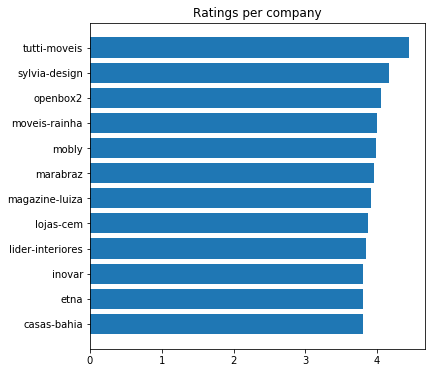

In [10]:
#Explore top ranting stores

import matplotlib.pyplot as plt
view = dff.groupby('store').agg({'rating': 'mean'}).reset_index().dropna()

height = view["rating"].sort_values()
bars = view["store"]
y_pos = np.arange(len(bars))

fig, ax = plt.subplots(figsize=(6,6))
plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.title('Ratings per company')
plt.show()

Stores has almost the same rating

In [11]:
#Numebr of reviews per store
a = dff.groupby('store').agg({'n_review_user': 'sum'}).reset_index().dropna().sort_values(by = 'n_review_user', ascending=False)
a


,store,n_review_user
0,casas-bahia,282506
5,magazine-luiza,195717
6,marabraz,23236
4,lojas-cem,19259
10,sylvia-design,8598
1,etna,7139
7,mobly,5346
9,openbox2,3884
8,moveis-rainha,3227
2,inovar,660


In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import wordcloud
import pandas as pd
import nltk
from nltk.corpus import stopwords

word_cloud_text = ' '.join(dff['caption'])
stop_words = set(stopwords.words("portuguese"))
without_stop_words = []
sentence = word_cloud_text
words = nltk.word_tokenize(sentence)
for word in words:
    if word not in stop_words:
        without_stop_words.append(word.lower())

word_cloud_text_SW = ' '.join(without_stop_words)

wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",\
                          scale = 10,width=800, height=400).generate(word_cloud_text_SW)

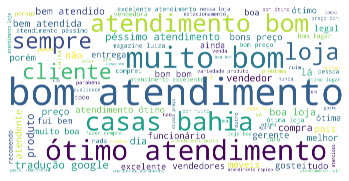

In [13]:
#Word cloud without stop words
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

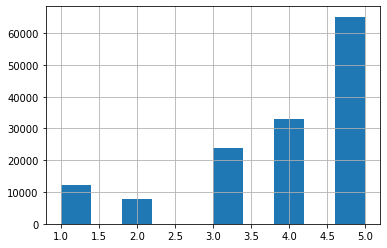

In [14]:
dff["rating"].hist()

### Investigating low ratings

In [16]:
dff.loc[dff["rating"]<2]

,caption,geo_location,id_review,n_photo_user,n_review_user,rating,relative_date,retrieval_date,store,url_user,username
23,Sistema trava na hora da compra mesmo com paga...,"{'lat': '-23.5448085', 'long': '-46.5175485'}",ChZDSUhNMG9nS0VJQ0FnSUNzOTdTbU5REAEaFlNBUkRDdF...,0,0,1.0,um mês atrás,2020-04-13T17:25:42Z,casas-bahia,https://www.google.com/maps/contrib/1181737922...,Fernando !
52,Atendimento horroroso e preços horripilantes,"{'lat': '-23.5448085', 'long': '-46.5175485'}",ChZDSUhNMG9nS0VJQ0FnSUNzbHVtQU9REAEaFjdpSFEta3...,0,0,1.0,2 meses atrás,2020-04-13T17:26:02Z,casas-bahia,https://www.google.com/maps/contrib/1111259834...,Christian Assolant Flocke
60,,"{'lat': '-23.5448085', 'long': '-46.5175485'}",ChdDSUhNMG9nS0VJQ0FnSUNzOVBTYm1nRRABGhYtYUdIZ2...,0,0,1.0,2 meses atrás,2020-04-13T17:26:08Z,casas-bahia,https://www.google.com/maps/contrib/1049411468...,Felipe Gamer
61,Não vá neste local se vc for comprar apenas 1 ...,"{'lat': '-23.5448085', 'long': '-46.5175485'}",ChdDSUhNMG9nS0VJQ0FnSUNzeElQSnZnRRABGhY3clMyaD...,0,0,1.0,2 meses atrás,2020-04-13T17:26:08Z,casas-bahia,https://www.google.com/maps/contrib/1122289233...,Leandro Fuentes
65,Minha mãe comprou uma geladeira em 14/12/19 e ...,"{'lat': '-23.5448085', 'long': '-46.5175485'}",ChZDSUhNMG9nS0VJQ0FnSUNzaUxqNmVBEAEaFmQwc3AwQV...,0,0,1.0,2 meses atrás,2020-04-13T17:26:08Z,casas-bahia,https://www.google.com/maps/contrib/1128121304...,sergio reis
...,...,...,...,...,...,...,...,...,...,...,...
142078,,"{'lat': '-23.5625817', 'long': '-46.5049787'}",ChdDSUhNMG9nS0VJQ0FnSURnNjhMZThBRRABGhZaclU0aF...,0,0,1.0,um ano atrás,2020-04-13T16:02:18Z,tutti-moveis,https://www.google.com/maps/contrib/1014818477...,adriano martins
142091,Uma experiencia pra nunca mais. Comprei um sof...,"{'lat': '-23.5625817', 'long': '-46.5049787'}",ChdDSUhNMG9nS0VJQ0FnSUNBaWV1OTBBRRABGhZ0Umpmaz...,0,1,1.0,2 anos atrás,2020-04-13T16:02:25Z,tutti-moveis,https://www.google.com/maps/contrib/1173669258...,edna edna Brito de Souza
142094,MOVEIS DE PÉSSIMA QUALIDADE E PÓS VENDA AINDA ...,"{'lat': '-23.5625817', 'long': '-46.5049787'}",ChdDSUhNMG9nS0VJQ0FnSURBLWNYNXp3RRABGhY3dnFYS2...,0,1,1.0,2 anos atrás,2020-04-13T16:02:25Z,tutti-moveis,https://www.google.com/maps/contrib/1042985148...,Marcio rezende
142095,"Péssimo pós vendas, na hora de comprar eles te...","{'lat': '-23.5625817', 'long': '-46.5049787'}",ChdDSUhNMG9nS0VJQ0FnSUN3NDZtSXZnRRABGhZPb1Fjcl...,0,0,1.0,2 anos atrás,2020-04-13T16:02:25Z,tutti-moveis,https://www.google.com/maps/contrib/1018410359...,Renato Flores


# Conclusions

1-Regarding ReclameAqui has more complains than cumpliments , gb has most part of reviews are high rating. 

2-Big stores has more reviews that makes the mean rating bit low.



# Next steps

Suggestions:
1- Show key words in low raitngs using word2vec

2- Explore more location

3- ratings over the time